In [1]:
# Imports
import os
path = None
path = os.path.dirname(os.getcwd())
os.chdir(path)
print("Le chemin est "+path)

#mport sys
#ys.path.append(path)
#rint(sys.path)
import pandas as pd
import locale
from matplotlib import pyplot as plt
import numpy as np
import sqlite3
from pandas_profiling import ProfileReport
from scripts.data_preparation import complete_data_recuperation
from time import time

locale.setlocale(locale.LC_ALL, 'fr_FR');

Le chemin est C:\Users\A38579\PyCharmProjects\Cine_ML


In [2]:
# Chemins

pdf_dir = os.path.join(path, 'data', 'data_cine_pdf')
raw_data_path = os.path.join(path, 'data', 'raw_data', 'df_raw.csv')
data_path = os.path.join(path, 'data', 'clean_data.csv')
movies_db_path = os.path.join(path, 'data', 'movies.db')
complete_data_path = os.path.join(path, 'data', 'complete_data', 'complete_df.csv')
data_profiles_path = os.path.join(path, 'data', 'data_profiles')

In [3]:
# Recuperation des données
#df = pd.read_csv(complete_data_path)
df = complete_data_recuperation(complete_data_path)

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25525 entries, 0 to 25524
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            25525 non-null  datetime64[ns]
 1   Salle                25525 non-null  category      
 2   Film                 25525 non-null  category      
 3   Version              25525 non-null  category      
 4   Relief               25525 non-null  category      
 5   Payants              23186 non-null  float64       
 6   Gratuits             3470 non-null   float64       
 7   Places libres        25495 non-null  float64       
 8   Taux remplissage     23260 non-null  float64       
 9   FullTitle            25333 non-null  category      
 10  Adult                25333 non-null  category      
 11  Release              25224 non-null  category      
 12  Language             25333 non-null  category      
 13  Genre                24840 non-

In [13]:
df

,date_time,Salle,Film,Version,Relief,Payants,Gratuits,Places libres,Taux remplissage,FullTitle,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2018-11-27 09:45:00,SALLE 6,L'île De Black Mór,FR,2D,136.0,10.0,142.0,50.69,L'île de Black Mór,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-11-27 10:55:00,SALLE 2,Diamant Noir,FR,2D,53.0,NaN,91.0,36.81,Diamant noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2018-11-27 14:00:00,SALLE 2,"Sobibor, 14 Octobre 1943, 16 Heures",FR,2D,54.0,NaN,90.0,37.50,"Sobibor, 14 Octobre 1943, 16 Heures",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-11-27 20:30:00,SALLE 1,Cold War,VO,2D,6.0,NaN,87.0,6.45,Cold War,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2018-11-27 20:30:00,SALLE 2,Bohemian Rhapsody,VF,2D,64.0,NaN,80.0,44.44,Bohemian Rhapsody,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25520,2022-08-07 20:30:00,SALLE 2,Bullet Train,VF,2D,NaN,NaN,144.0,NaN,Bullet Train,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25521,2022-08-07 20:30:00,SALLE 4,Thor: Love And Thunder,VF,2D,NaN,NaN,93.0,NaN,Thor: Love and Thunder,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25522,2022-08-07 20:30:00,SALLE 5,L'année Du Requin,FR,2D,NaN,NaN,114.0,NaN,L'Année du requin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25523,2022-08-07 20:40:00,SALLE 6,Les Minions 2 : Il était Une Fois Gru,VF,2D,NaN,NaN,288.0,NaN,Minions: The Rise of Gru,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Description des données

- **Film** : Titre du film (chaîne de caractères)
- **Version** : Langue des dialogues ('_FR_' pour film français en langue originale, '_VF_' pour film étranger en langue française et '_VO_' pour film étranger en langue originale)
- **Relief** : Option supplémentaire ('_2D_' si l'option est désactivée, '_3D_' si l'option est activée)
- **Payants** : Nombre d'entrées vendues (valeur numérique)
- **Gratuits** : Nombre d'entrées gratuites (valeur numérique)
- **Places libres** : Nombre de places restantes dans la salle (valeur numérique)
- **Taux remplissage** : Niveau de remplissage de la salle (pourcentage, calculé par : (nombre d'entrées payantes + nombre d'entrées gratuites) / nombre de places)

### Nettoyage et preparation

#### "Profiling" des données

In [ ]:
# "Profiling" des données
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_file(os.path.join(data_profiles_path, 'complete_data_profile.html'))
profile.to_widgets()

In [ ]:
df["L'avis de  historique-meteo.net"].unique()

### Statistiques descriptives

In [5]:
# Matrice des corrélations
corr_matrix = df.corr()
corr_matrix

,Payants,Gratuits,Places libres,Taux remplissage,Popularity,Vote_average,Vote_count,Température maximale,Température minimale,Vitesse du vent,...,Visibilité,Couverture nuageuse,Indice de chaleur,Point de rosée,Pression,vacances_zone_a,vacances_zone_b,vacances_zone_c,ferie,Nombre entrees
Payants,1.000000,0.341856,-0.123201,0.857040,0.125790,0.143759,0.221624,-0.103938,-0.059150,0.038141,...,-0.055710,0.085112,-0.105795,-0.073318,-0.013528,0.095872,0.082184,0.075994,0.011380,0.998824
Gratuits,0.341856,1.000000,-0.169406,0.414253,-0.012664,0.074084,-0.030568,-0.070927,-0.060369,0.010864,...,0.027200,0.019054,-0.071363,-0.073093,0.003603,-0.117421,-0.065524,-0.074932,-0.035729,0.389502
Places libres,-0.123201,-0.169406,1.000000,-0.410281,0.093030,0.033673,0.105886,0.047846,0.029174,-0.018260,...,0.024393,-0.038039,0.048551,0.037145,0.003806,-0.038128,-0.032354,-0.032406,-0.006514,-0.124484
Taux remplissage,0.857040,0.414253,-0.410281,1.000000,0.080373,0.121150,0.151714,-0.136774,-0.087946,0.041376,...,-0.061582,0.103015,-0.139072,-0.104305,-0.001430,0.103563,0.087045,0.079311,0.013236,0.861082
Popularity,0.125790,-0.012664,0.093030,0.080373,1.000000,0.300738,0.249368,0.202721,0.069755,0.026460,...,0.050620,-0.095070,0.187006,0.066939,-0.014100,0.073105,0.070005,0.080832,0.018252,0.126659
Vote_average,0.143759,0.074084,0.033673,0.121150,0.300738,1.000000,0.435932,-0.077395,-0.069626,-0.008845,...,-0.037343,0.048584,-0.078415,-0.052335,-0.004048,-0.049473,-0.035926,-0.043138,0.007033,0.144950
Vote_count,0.221624,-0.030568,0.105886,0.151714,0.249368,0.435932,1.000000,-0.042451,-0.007187,0.011070,...,-0.004023,-0.008535,-0.040747,-0.014853,0.006749,0.034522,0.026821,0.049890,0.023460,0.223450
Température maximale,-0.103938,-0.070927,0.047846,-0.136774,0.202721,-0.077395,-0.042451,1.000000,0.838080,-0.067038,...,0.377989,-0.502018,0.996528,0.845102,-0.211150,0.267906,0.268376,0.275092,0.017342,-0.106709
Température minimale,-0.059150,-0.060369,0.029174,-0.087946,0.069755,-0.069626,-0.007187,0.838080,1.000000,0.021514,...,0.215656,-0.139570,0.848292,0.928162,-0.373249,0.253494,0.246288,0.280429,0.010237,-0.062130
Vitesse du vent,0.038141,0.010864,-0.018260,0.041376,0.026460,-0.008845,0.011070,-0.067038,0.021514,1.000000,...,-0.016320,0.136327,-0.074606,-0.117505,-0.186371,-0.071210,-0.089430,-0.075830,-0.026195,0.039386


In [6]:
corr_matrix['Nombre entrees'].sort_values(ascending=False)

Nombre entrees          1.000000
Payants                 0.998824
Taux remplissage        0.861082
Gratuits                0.389502
Vote_count              0.223450
Vote_average            0.144950
Popularity              0.126659
vacances_zone_a         0.094703
Couverture nuageuse     0.092449
vacances_zone_b         0.080397
Précipitations          0.079985
vacances_zone_c         0.075305
Humidité                0.040455
Vitesse du vent         0.039386
ferie                   0.015401
Pression               -0.013839
Visibilité             -0.055419
Température minimale   -0.062130
Température du vent    -0.067675
Point de rosée         -0.077918
Température maximale   -0.106709
Indice de chaleur      -0.108163
Places libres          -0.124484
Name: Nombre entrees, dtype: float64

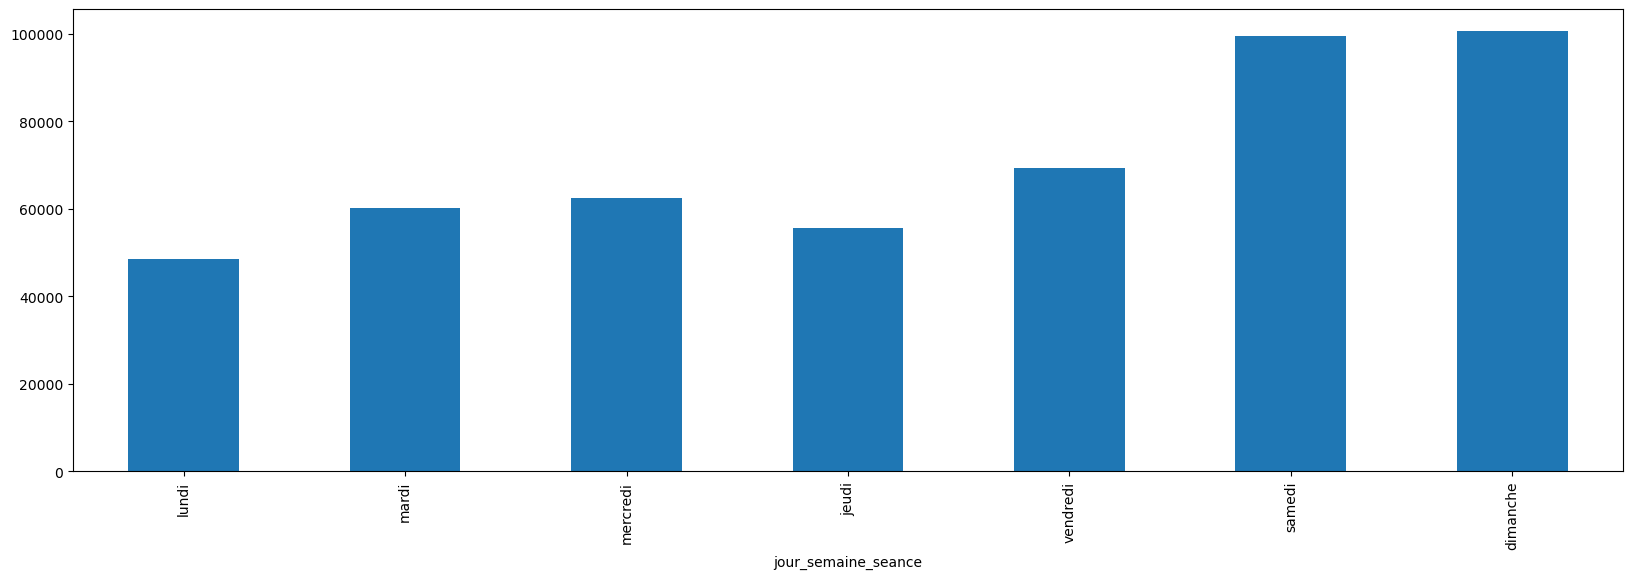

In [8]:
jours=['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']
df.groupby('jour_semaine_seance').sum().reindex(jours)['Nombre entrees'].plot(kind='bar',
                                                   figsize=(20, 6));

### Modelisation

In [5]:
# Preparation des données
df_train = df[['Salle', 'Film', 'Version', 'Relief', 'FullTitle', 'Adult',
       'Release', 'Language', 'Popularity', 'Vote_average',
       'Vote_count', 'Max_temp', 'Min_temp', 'Vitesse_vent',
       'Temp_vent', 'Precipitations', 'Humidite', 'Visibilite',
       'Couverture nuageuse', 'Indice de chaleur', 'Point de rosee',
       'Pression', 'Lever_soleil', 'Coucher_soleil', 'Duree du jour',
       'Avis_meteo', 'vacances_zone_a', 'vacances_zone_b', 'vacances_zone_c',
       'nom_vacances', 'ferie', 'Nombre entrees', 'jour_semaine_seance',
       'jour_seance', 'annee_seance', 'heure_seance', 'mois_seance', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']]
X_xgb = df_train.drop(columns = ['Nombre entrees'])
y_xgb = df_train['Nombre entrees']

In [6]:
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_xgb,y_xgb,test_size=0.3,random_state=42)

In [17]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(tree_method="hist", enable_categorical=True, use_label_encoder=False)
model_xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': True,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

In [18]:
start=time()
model_xgb.fit(X_train,
              y_train,
              verbose=True)
print('temps apprentissage: '+str(time()-start))

C:\Users\A38579\AppData\Local\Continuum\anaconda3\envs\Cine_ML2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


ValueError: Experimental support for categorical data is not implemented for current tree method yet.